<a href="https://colab.research.google.com/github/neeluvermaiitj/Dependable-AI/blob/main/B_Performing_attcaks_on_Cipher10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Perform FGSM attack

In [ ]:
!pip install adversarial-robustness-toolbox
import art
import scipy.io
from art.estimators.classification import KerasClassifier
import keras
from keras.datasets import cifar10
import tensorflow as tf
from keras.models import load_model
from keras.utils import to_categorical
import scipy.io as sio
import random
import numpy as np
import matplotlib.pyplot as plt
from art.attacks.evasion import FastGradientMethod

In [ ]:
def get_label(probs):
  #  labels
  probs = probs[0]
  max_index = np.where(probs == (max(probs)))
  print(max_index[0],probs[max_index])
  return max_index[0],probs[max_index]

In [ ]:
def display_images(image, description,model):
  label, confidence = get_label(model.predict(image))
  labelindex = np.where(description == 1)
  plt.figure(figsize =(1.5,1.5))
  plt.imshow(image[0])
  plt.title('Original Label: {} Predicted Label: {} : {:.2f}% Confidence'.format(labels[labelindex[0][0]],
                                                   labels[label[0]], confidence[0]*100))
  plt.show() 

In [ ]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm 

In [ ]:
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY,testX, testY

In [ ]:
def fgsmattack(x,model,epsilon = 0.2):
  classifier = KerasClassifier(model=model)
  adverserial = FastGradientMethod(classifier,eps = epsilon,batch_size = 64)
  x_adv = adverserial.generate(x)
  return x_adv

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


accuracy on test dataset > 81.750
accuracy on FGSM adverserial test dataset > 20.710
Original Image
[5] [0.9999232]


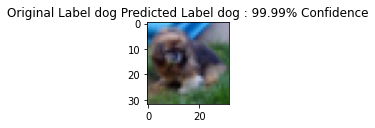

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Perturbed Image
[7] [0.5398115]


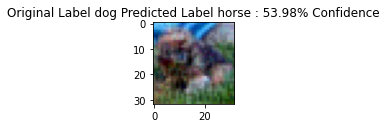

Original Image
[1] [1.]


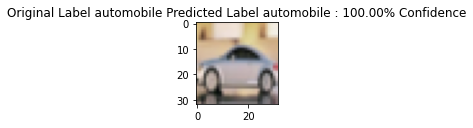

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Perturbed Image
[1] [1.]


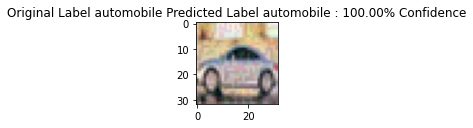

Original Image
[0] [0.9999994]


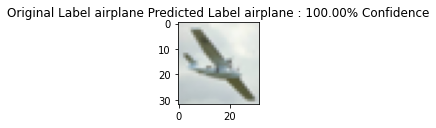

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Perturbed Image
[2] [0.9999956]


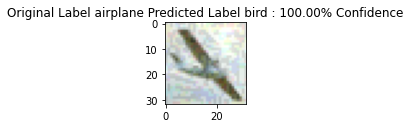

Original Image
[6] [0.9999949]


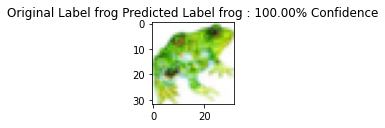

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Perturbed Image
[2] [0.9996201]


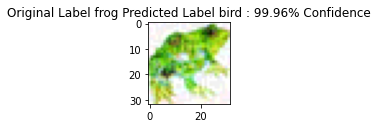

Original Image
[5] [0.90877753]


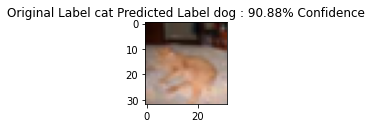

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Perturbed Image
[6] [0.99953365]


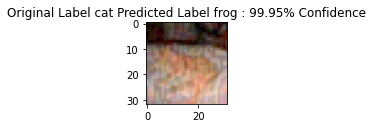

Original Image
[3] [0.999926]


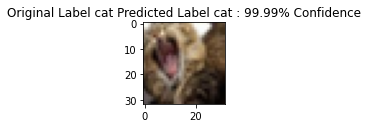

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Perturbed Image
[5] [0.99999976]


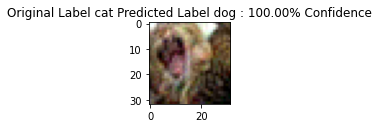

Original Image
[8] [0.9989881]


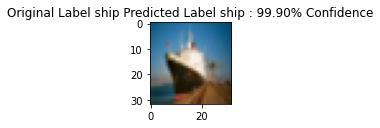

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Perturbed Image
[4] [0.9999914]


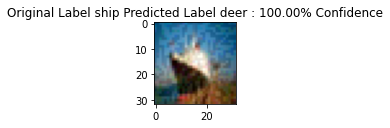

Original Image
[9] [0.999918]


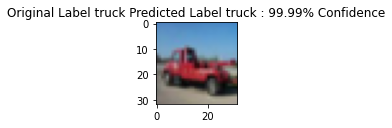

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Perturbed Image
[1] [0.99999833]


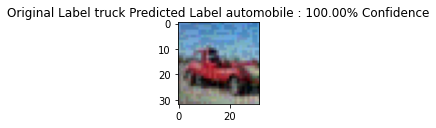

Original Image
[5] [0.9995278]


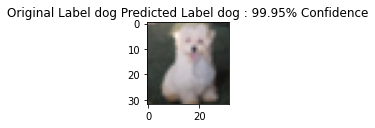

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Perturbed Image
[3] [0.9998584]


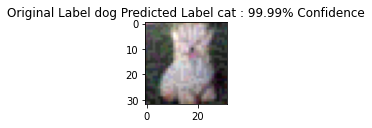

Original Image
[7] [1.]


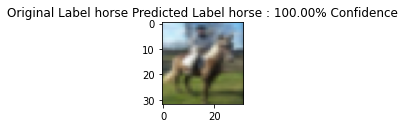

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Perturbed Image
[4] [1.]


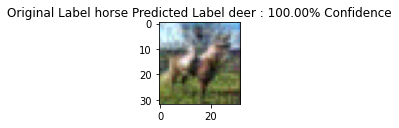

In [ ]:
def run_test_harness():
  # load model
  model_save_name = 'CIFAR10_model.h5'
  path = F"/content/drive/MyDrive/Colab Notebooks/DAI_Assignment2/cifar10_code/{model_save_name}"
  model = load_model(path)
  # load dataset
  trainX, trainY,testX, testY = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  testXadv = fgsmattack(testX,model,epsilon=0.05)
  # evaluate model on test dataset
  _, acc = model.evaluate(testX, testY, verbose=1)
  print('accuracy on test dataset > %.3f' % (acc * 100.0))
  # evaluate model on test FGSM attacked dataset
  _, acc = model.evaluate(testXadv, testY, verbose=1)
  print('accuracy on FGSM adverserial test dataset > %.3f' % (acc * 100.0))
  for i in range(10):
    print('Original Image')
    randomimage = random.randint(1,testX.shape[0])
    x= testX[randomimage]
    y = testY[randomimage]
    x = np.reshape(x,(1,32,32,3))
    display_images(x,y,model)
    print('Perturbed Image')
    x= testXadv[randomimage]
    y = testY[randomimage]
    x = np.reshape(x,(1,32,32,3))
    display_images(x,y,model)
  # MAT_save_name = 'fgsm_cnn_pert.mat'
  # path = F"/content/gdrive/My Drive/{MAT_save_name}"
  # scipy.io.savemat(path, {'mydata': testXadv})
# entry point, run the test harness
labels = [  'airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
tf.compat.v1.disable_eager_execution()
loss_object = tf.keras.losses.CategoricalCrossentropy()
run_test_harness()

# Perform L Infinity (LINF) Attack

In [ ]:
import art
from art.estimators.classification import KerasClassifier
from scipy.io import loadmat
import keras
from keras.datasets import cifar10
import tensorflow as tf
from keras.models import load_model
from keras.utils import to_categorical
import scipy.io as sio
import random
import numpy as np
import matplotlib.pyplot as plt
from art.attacks.evasion import FastGradientMethod,CarliniLInfMethod

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


accuracy on test dataset > 81.750
accuracy on L-infinity adverserial test dataset > 66.750
Original Image
[0] [0.9946108]


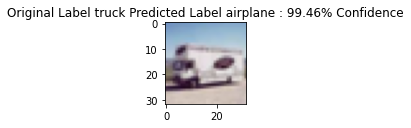

Pertrbed Image
[9] [0.9579229]


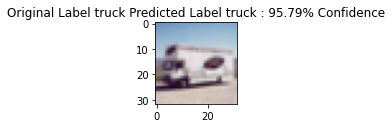

Original Image
[0] [1.]


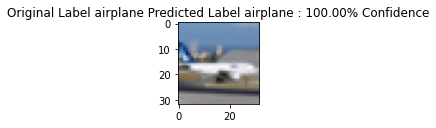

Pertrbed Image
[0] [1.]


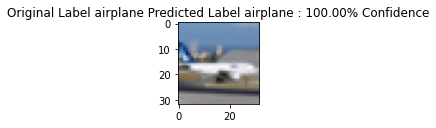

Original Image
[7] [0.9456852]


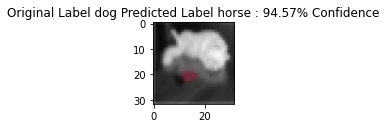

Pertrbed Image
[5] [0.88384926]


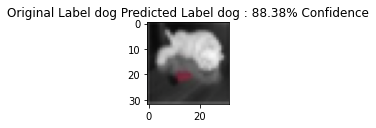

Original Image
[0] [0.9999995]


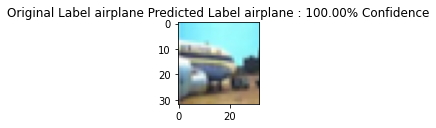

Pertrbed Image
[0] [0.9999995]


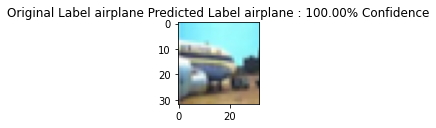

Original Image
[7] [1.]


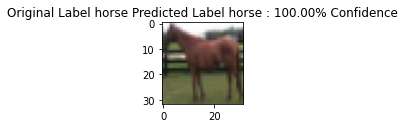

Pertrbed Image
[7] [1.]


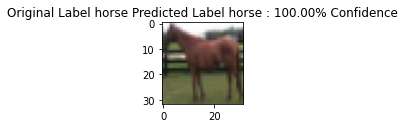

Original Image
[8] [1.]


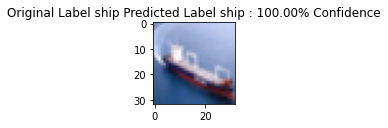

Pertrbed Image
[8] [1.]


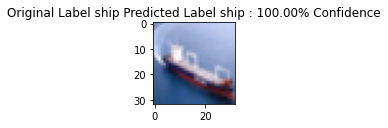

Original Image
[7] [0.9999926]


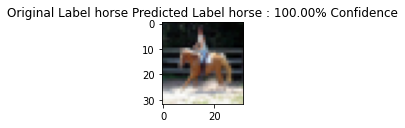

Pertrbed Image
[7] [0.9999926]


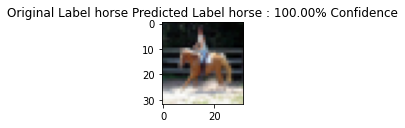

Original Image
[6] [0.9999999]


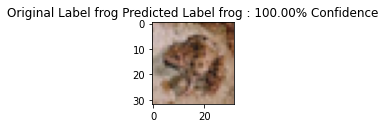

Pertrbed Image
[6] [0.9999999]


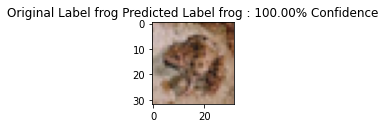

Original Image
[8] [0.59432375]


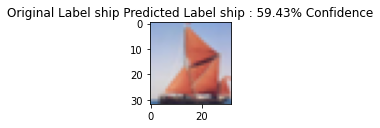

Pertrbed Image
[0] [0.58228964]


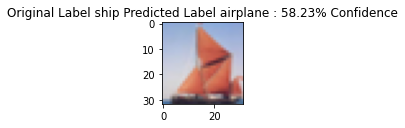

Original Image
[7] [0.9918412]


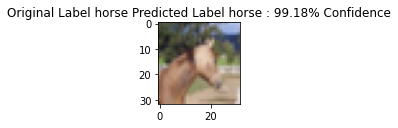

Pertrbed Image
[4] [0.50142777]


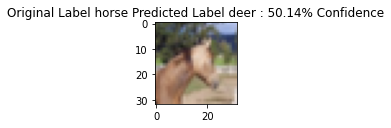

In [ ]:
def get_label(probs):
  #  labels
  probs = probs[0]
  max_index = np.where(probs == (max(probs)))
  print(max_index[0],probs[max_index])
  return max_index[0],probs[max_index]
def display_images(image, description,model):
  label, confidence = get_label(model.predict(image))
  labelindex = np.where(description == 1)
  plt.figure(figsize =(1.5,1.5))
  plt.imshow(image[0])
  plt.title('Original Label {} Predicted Label {} : {:.2f}% Confidence'.format(labels[labelindex[0][0]],
                                                   labels[label[0]], confidence[0]*100))
  plt.show() 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm 
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY,testX, testY

def linfattack(x,model,epsilon = 0.2):
  classifier = KerasClassifier(model=model)
  adverserial = CarliniLInfMethod(classifier,eps = epsilon,batch_size = 64)
  #adverserial = CarliniLInfMethod(classifier=classifier, eps=0.3, max_iter=100, learning_rate=0.01)
  x_adv = adverserial.generate(x)
  return x_adv
def fgsmattack(x,model,epsilon = 0.2):
  classifier = KerasClassifier(model=model)
  adverserial = FastGradientMethod(classifier,eps = epsilon,batch_size = 64)
  x_adv = adverserial.generate(x)
  return x_adv
def run_test_harness():
  # load model
  model_save_name = 'CIFAR10_model.h5'
  path = F"/content/drive/MyDrive/Colab Notebooks/DAI_Assignment2/cifar10_code/{model_save_name}"
  model = load_model(path)

  # load dataset
  trainX, trainY,testX, testY = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)

  MAT_save_name = 'testXlinf_cnn_pert.mat'
  path = F"/content/drive/MyDrive/Colab Notebooks/DAI_Assignment2/cifar10_code/{MAT_save_name}"
  annots = loadmat(path)
  annots.keys()  
  testXadv = annots['mydata']

  # evaluate model on test dataset
  _, acc = model.evaluate(testX, testY, verbose=1)
  print('accuracy on test dataset > %.3f' % (acc * 100.0))
  # evaluate model on test L_inf attacked dataset
  _, acc = model.evaluate(testXadv, testY, verbose=1)
  print('accuracy on L-infinity adverserial test dataset > %.3f' % (acc * 100.0))

  for i in range(10):
    print('Original Image')
    randomimage = random.randint(1,testX.shape[0])
    x= testX[randomimage]
    y = testY[randomimage]
    x = np.reshape(x,(1,32,32,3))
    display_images(x,y,model)
    print('Pertrbed Image')
    x= testXadv[randomimage]
    y = testY[randomimage]
    x = np.reshape(x,(1,32,32,3))
    display_images(x,y,model)

# entry point, run the test harness
labels = [  'airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
tf.compat.v1.disable_eager_execution()
loss_object = tf.keras.losses.CategoricalCrossentropy()
run_test_harness()

#Attack After Perturbation


Class wise accuracies for L-Infinity attack


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


[['airplane' '0.7010752688172043']
 ['automobile' '0.8180039138943248']
 ['bird' '0.5273909006499535']
 ['cat' '0.49715585893060293']
 ['deer' '0.5668789808917197']
 ['dog' '0.5855855855855856']
 ['frog' '0.6722466960352423']
 ['horse' '0.7184661957618567']
 ['ship' '0.8392857142857143']
 ['truck' '0.7723735408560312']]
Class wise accuracies for FGSM attack
[['airplane' '0.256']
 ['automobile' '0.33933518005540164']
 ['bird' '0.15233644859813084']
 ['cat' '0.20078226857887874']
 ['deer' '0.09389140271493213']
 ['dog' '0.2198100407055631']
 ['frog' '0.11827321111768184']
 ['horse' '0.3047508690614137']
 ['ship' '0.46558704453441296']
 ['truck' '0.2581155977830562']]
Original Image
[0] [1.]


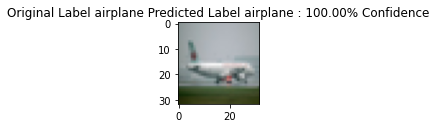

FGSM Pertrbed Image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0] [0.9962829]


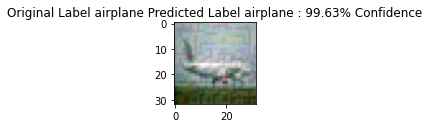

L-inf Pertrbed Image
[0] [1.]


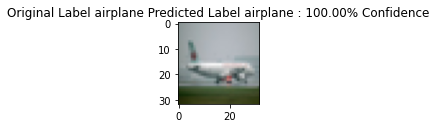

Original Image
[2] [1.]


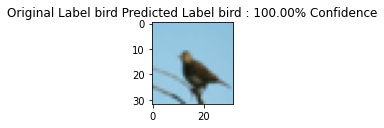

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


FGSM Pertrbed Image
[4] [0.7250935]


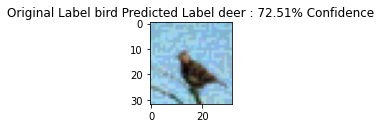

L-inf Pertrbed Image
[2] [1.]


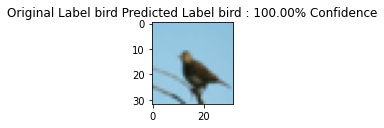

Original Image
[3] [0.9999906]


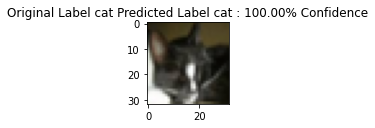

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


FGSM Pertrbed Image
[4] [0.9967603]


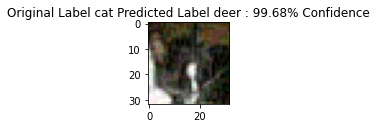

L-inf Pertrbed Image
[3] [0.9999906]


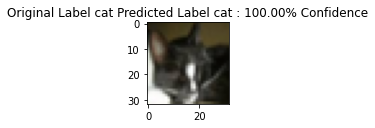

Original Image
[2] [0.98754454]


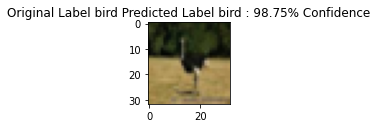

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


FGSM Pertrbed Image
[4] [1.]


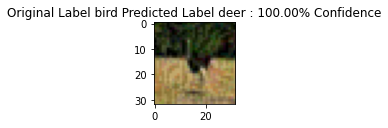

L-inf Pertrbed Image
[4] [0.9999988]


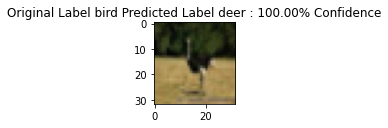

Original Image
[1] [1.]


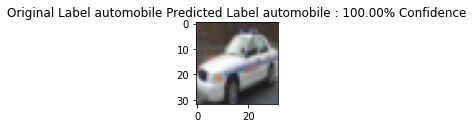

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


FGSM Pertrbed Image
[8] [0.99999964]


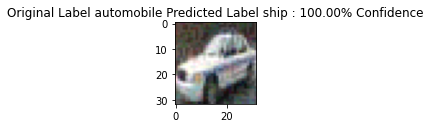

L-inf Pertrbed Image
[1] [1.]


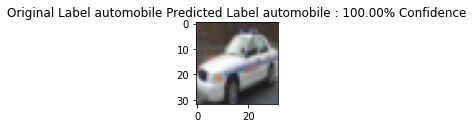

Original Image
[6] [1.]


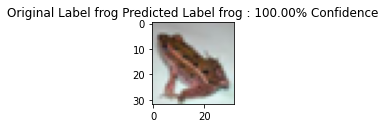

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


FGSM Pertrbed Image
[3] [0.950383]


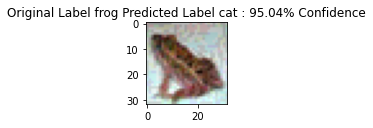

L-inf Pertrbed Image
[6] [1.]


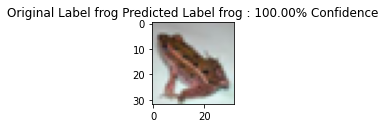

Original Image
[5] [0.99890614]


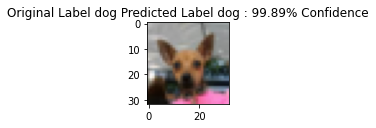

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


FGSM Pertrbed Image
[4] [0.9924918]


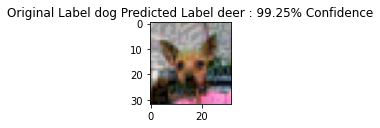

L-inf Pertrbed Image
[5] [0.99890614]


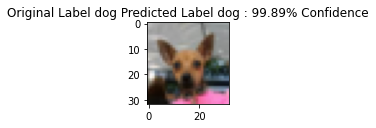

Original Image
[4] [0.9999999]


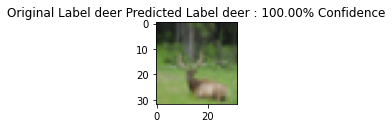

FGSM Pertrbed Image
[2] [0.9198634]


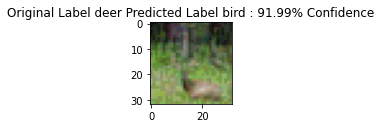

L-inf Pertrbed Image
[4] [0.9999999]


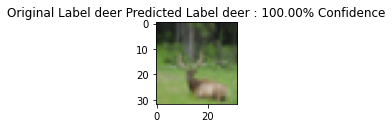

Original Image
[9] [0.93703455]


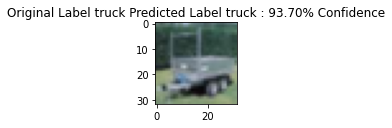

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


FGSM Pertrbed Image
[8] [0.85875875]


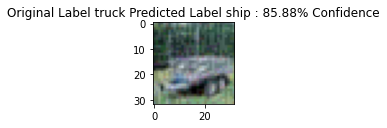

L-inf Pertrbed Image
[1] [0.7038034]


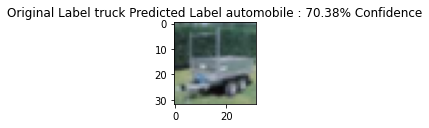

Original Image
[5] [0.99999976]


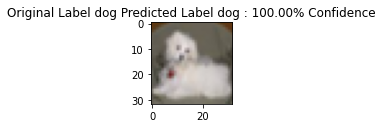

FGSM Pertrbed Image
[2] [0.7572469]


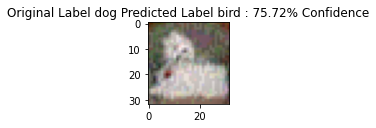

L-inf Pertrbed Image
[5] [0.99999976]


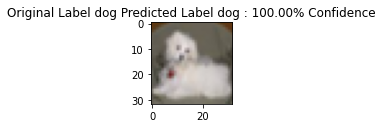

In [ ]:

from scipy.io import loadmat
import keras
from keras.datasets import cifar10
import tensorflow as tf
from keras.models import load_model
from keras.utils import to_categorical
import scipy.io as sio
import random
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
def get_label(probs):
  #  labels
  probs = probs[0]
  max_index = np.where(probs == (max(probs)))
  print(max_index[0],probs[max_index])
  return max_index[0],probs[max_index]
def display_images(image, description,model):
  label, confidence = get_label(model.predict(image))
  labelindex = np.where(description == 1)
  plt.figure(figsize =(1.5,1.5))
  plt.imshow(image[0])
  plt.title('Original Label {} Predicted Label {} : {:.2f}% Confidence'.format(labels[labelindex[0][0]],
                                                   labels[label[0]], confidence[0]*100))
  plt.show() 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm 
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY1) = cifar10.load_data()
  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY1)
  return trainX, trainY,testX, testY, testY1

def linfattack(x,model,epsilon = 0.2):
  classifier = KerasClassifier(model=model)
  adverserial = CarliniLInfMethod(classifier,eps = epsilon,batch_size = 64)
  #adverserial = CarliniLInfMethod(classifier=classifier, eps=0.3, max_iter=100, learning_rate=0.01)
  x_adv = adverserial.generate(x)
  return x_adv
def fgsmattack(x,model,epsilon = 0.2):
  classifier = KerasClassifier(model=model)
  adverserial = FastGradientMethod(classifier,eps = epsilon,batch_size = 64)
  x_adv = adverserial.generate(x)
  return x_adv
def run_test_harness():
  # load model
  model_save_name = 'CIFAR10_model.h5'
  path = F"/content/drive/MyDrive/Colab Notebooks/DAI_Assignment2/cifar10_code/{model_save_name}"
  model = load_model(path)

  # load dataset
  trainX, trainY,testX, testY, testY1 = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)

  MAT_save_name = 'testXlinf_cnn_pert.mat'
  path = F"/content/gdrive/MyDrive/Colab Notebooks/DAI_Assignment2/cifar10_code/{MAT_save_name}"
  annots = loadmat(path)
  annots.keys()  
  testXadv1 = annots['mydata']

  print("Class wise accuracies for L-Infinity attack")
  y_pred = np.argmax(model.predict(testXadv1), axis = 1)
  confustion_matrix= confusion_matrix(y_pred,  testY1)
  confustion_matrix= confustion_matrix.astype('float') / confustion_matrix.sum(axis=1)[:, np.newaxis]
  print(np.array([[a, b] for a, b in zip(labels, confustion_matrix.diagonal())]))

  MAT_save_name = 'fgsm_cnn_pert.mat'
  path = F"/content/gdrive/MyDrive/Colab Notebooks/DAI_Assignment2/cifar10_code/{MAT_save_name}"
  annots = loadmat(path)
  annots.keys()  
  testXadv = annots['mydata']

  print("Class wise accuracies for FGSM attack")
  y_pred = np.argmax(model.predict(testXadv), axis = 1)
  confustion_matrix= confusion_matrix(y_pred,  testY1)
  confustion_matrix= confustion_matrix.astype('float') / confustion_matrix.sum(axis=1)[:, np.newaxis]
  print(np.array([[a, b] for a, b in zip(labels, confustion_matrix.diagonal())]))

  for i in range(10):
    print('Original Image')
    randomimage = random.randint(1,testX.shape[0])
    x= testX[randomimage]
    y = testY[randomimage]
    x = np.reshape(x,(1,32,32,3))
    display_images(x,y,model)
    print('FGSM Pertrbed Image')
    x= testXadv[randomimage]
    y = testY[randomimage]
    x = np.reshape(x,(1,32,32,3))
    display_images(x,y,model)
    print('L-inf Pertrbed Image')
    x= testXadv1[randomimage]
    y = testY[randomimage]
    x = np.reshape(x,(1,32,32,3))
    display_images(x,y,model)

# entry point, run the test harness
labels = [  'airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
tf.compat.v1.disable_eager_execution()
loss_object = tf.keras.losses.CategoricalCrossentropy()
run_test_harness()

# Projected Gradient Descent Attack

In [ ]:

from scipy.io import loadmat
import keras
from keras.datasets import cifar10
import tensorflow as tf
from keras.models import load_model
from keras.utils import to_categorical
import scipy.io as sio
import random
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
def get_label(probs):
  #  labels
  probs = probs[0]
  max_index = np.where(probs == (max(probs)))
  print(max_index[0],probs[max_index])
  return max_index[0],probs[max_index]
def display_images(image, description,model):
  label, confidence = get_label(model.predict(image))
  labelindex = np.where(description == 1)
  plt.figure(figsize =(1.5,1.5))
  plt.imshow(image[0])
  plt.title('Original Label {} Predicted Label {} : {:.2f}% Confidence'.format(labels[labelindex[0][0]],
                                                   labels[label[0]], confidence[0]*100))
  plt.show() 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm 
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY1) = cifar10.load_data()
  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY1)
  return trainX, trainY,testX, testY, testY1

def linfattack(x,model,epsilon = 0.2):
  classifier = KerasClassifier(model=model)
  adverserial = CarliniLInfMethod(classifier,eps = epsilon,batch_size = 64)
  #adverserial = CarliniLInfMethod(classifier=classifier, eps=0.3, max_iter=100, learning_rate=0.01)
  x_adv = adverserial.generate(x)
  return x_adv
def fgsmattack(x,model,epsilon = 0.2):
  classifier = KerasClassifier(model=model)
  adverserial = FastGradientMethod(classifier,eps = epsilon,batch_size = 64)
  x_adv = adverserial.generate(x)
  return x_adv
def run_test_harness():
  # load model
  model_save_name = 'CIFAR10_model.h5'
  path = F"/content/drive/MyDrive/Colab Notebooks/DAI_Assignment2/cifar10_code/{model_save_name}"
  model = load_model(path)


  # load dataset
  trainX, trainY,testX, testY, testY1 = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)

 

import art
from art.attacks.evasion import ProjectedGradientDescentTensorFlowV2
from art.classifiers import PyTorchClassifier

#classifier = art.estimators.classification.KerasClassifier(model)

classifier = PyTorchClassifier(
    model=model,
    clip_values=(0.0, 1.0),
    loss=criterion,
    optimizer=opt,
    input_shape=(3, 32, 32),
    nb_classes=10,
)


epsilon = 0.02

adv_crafter = art.attacks.evasion.ProjectedGradientDescentTensorFlowV2(classifier, eps=epsilon, batch_size=256 )

x_train_adv = adv_crafter.generate(trainX)

x_test_adv = adv_crafter.generate(testX)

print('Train data shape: ', trainX.shape)
print('Train labels shape: ', trainY.shape)
print('Test data shape: ', testX.shape)
print('Test labels shape: ', testY.shape)

